In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
data = pd.read_csv('TCS1.csv')

In [5]:
# Display the first few rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


# 1. Handling Missing Values

In [6]:
# Check for missing values
data.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [7]:
# Drop rows with missing values
data.dropna(inplace=True)

In [10]:
# Display the shape of the dataset
data.shape

(4486, 7)

In [8]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4486 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4486 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 280.4+ KB


# 2. Handling Date Information

In [9]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# 3. Feature Selection

In [12]:
# Feature selection (Choose relevant features such as Open, High, Low, Volume)
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

In [24]:
# Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# 4. Feature Scaling

In [14]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  

In [15]:
# Feature scaling for improved model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# 5. Model Evaluation

In [18]:
# Calculate Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [19]:
# Display evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 260.6755628453193
Mean Absolute Error: 12.126577197303268


# 6. Adjusting Plotting

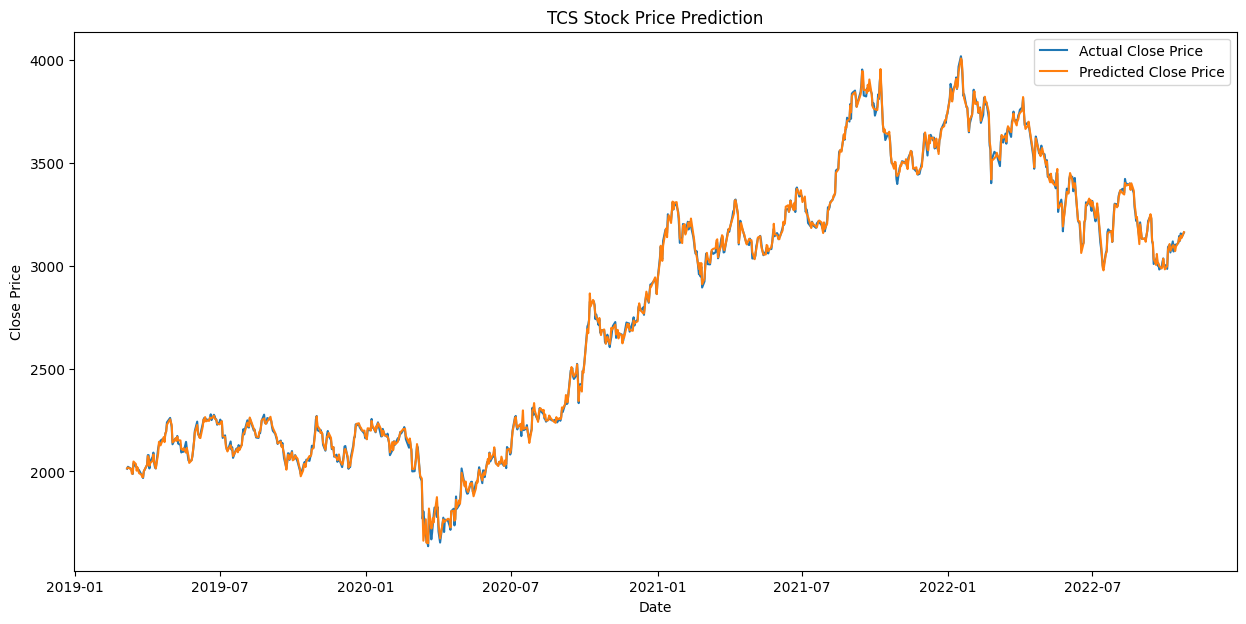

In [21]:
# Visualize the predictions against the actual close prices
plt.figure(figsize=(15, 7))
plt.plot(data['Date'][-len(y_test):], y_test, label="Actual Close Price")
plt.plot(data['Date'][-len(y_test):], y_pred, label="Predicted Close Price")
plt.xlabel('Date')  
plt.ylabel('Close Price')
plt.title('TCS Stock Price Prediction')
plt.legend()
plt.show()